# To visualize State-wise Confirmed and Cured cases & To Predict Number of People Cured


In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [121]:
df=pd.read_csv("covid_19_india.csv")

In [122]:
df.head()

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,30/01/20,6:00 PM,Kerala,1,0,0.0,0.0,1
1,2,31/01/20,6:00 PM,Kerala,1,0,0.0,0.0,1
2,3,01/02/20,6:00 PM,Kerala,2,0,0.0,0.0,2
3,4,02/02/20,6:00 PM,Kerala,3,0,0.0,0.0,3
4,5,03/02/20,6:00 PM,Kerala,3,0,0.0,0.0,3


In [123]:
df=df.rename(columns={"State/UnionTerritory" : "State"})
df.head()

,Sno,Date,Time,State,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,30/01/20,6:00 PM,Kerala,1,0,0.0,0.0,1
1,2,31/01/20,6:00 PM,Kerala,1,0,0.0,0.0,1
2,3,01/02/20,6:00 PM,Kerala,2,0,0.0,0.0,2
3,4,02/02/20,6:00 PM,Kerala,3,0,0.0,0.0,3
4,5,03/02/20,6:00 PM,Kerala,3,0,0.0,0.0,3


In [ ]:
# Group by State/ UT

In [124]:
df1=df.groupby("State")["Cured","Deaths","Confirmed"].max()

C:\Users\NAVEEN KUMAR\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


In [ ]:
#Drop Null Values

In [125]:
df1.dropna(inplace=True)

In [126]:
df1.head(15)

,Cured,Deaths,Confirmed
State,,,
Andaman and Nicobar Islands,33.0,0.0,33
Andhra Pradesh,1640.0,53.0,2602
Arunachal Pradesh,1.0,0.0,1
Assam,48.0,4.0,170
Bihar,571.0,10.0,1674
Chandigarh,57.0,3.0,202
Chhattisgarh,59.0,0.0,115
Dadar Nagar Haveli,0.0,0.0,1
Delhi,5192.0,176.0,11088


In [127]:
df1["recovery_rate"]=(df1.Cured/df1.Confirmed)*100 

In [128]:
df1["recovery_rate"]=round(df1["recovery_rate"])
df1.head()


,Cured,Deaths,Confirmed,recovery_rate
State,,,,
Andaman and Nicobar Islands,33.0,0.0,33,100.0
Andhra Pradesh,1640.0,53.0,2602,63.0
Arunachal Pradesh,1.0,0.0,1,100.0
Assam,48.0,4.0,170,28.0
Bihar,571.0,10.0,1674,34.0


In [129]:
df1=df1.fillna(0)

In [131]:
df1=df1.sort_values("Confirmed", ascending=False)
df1

,Cured,Deaths,Confirmed,recovery_rate
State,,,,
Maharashtra,10318.0,1390.0,39297,26.0
Tamil Nadu,5882.0,87.0,13191,45.0
Gujarat,5219.0,749.0,12537,42.0
Delhi,5192.0,176.0,11088,47.0
Rajasthan,3404.0,147.0,6015,57.0
Madhya Pradesh,2733.0,267.0,5735,48.0
Uttar Pradesh,3066.0,127.0,5175,59.0
West Bengal,1136.0,253.0,3103,37.0
Andhra Pradesh,1640.0,53.0,2602,63.0


In [132]:
 df1 = df1.drop(df1[df1['recovery_rate']==0].index)
df1

,Cured,Deaths,Confirmed,recovery_rate
State,,,,
Maharashtra,10318.0,1390.0,39297,26.0
Tamil Nadu,5882.0,87.0,13191,45.0
Gujarat,5219.0,749.0,12537,42.0
Delhi,5192.0,176.0,11088,47.0
Rajasthan,3404.0,147.0,6015,57.0
Madhya Pradesh,2733.0,267.0,5735,48.0
Uttar Pradesh,3066.0,127.0,5175,59.0
West Bengal,1136.0,253.0,3103,37.0
Andhra Pradesh,1640.0,53.0,2602,63.0


In [184]:
x=df1.index
y=df1.Confirmed
y1=df1.Deaths
y2=df1.Cured

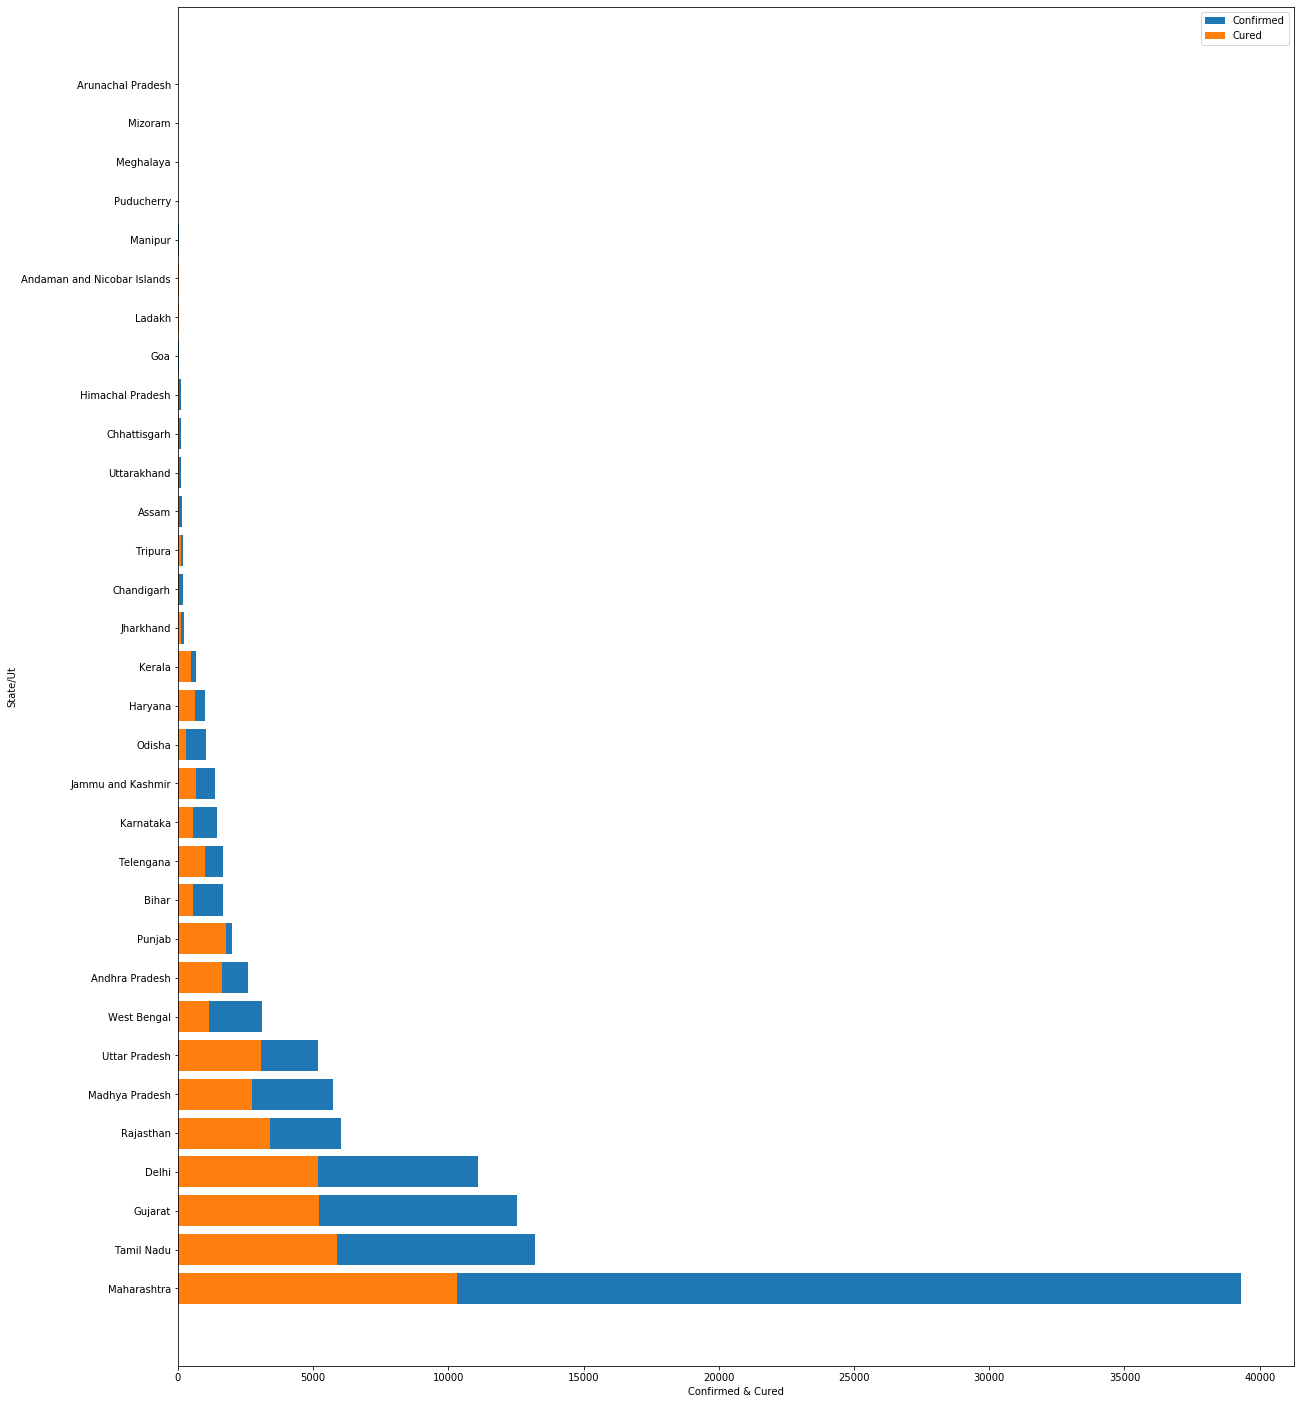

In [191]:
plt.figure(figsize=(20,25))
plt.barh(x,y, label="Confirmed")

plt.barh(x,y2, label="Cured")
plt.xlabel( "Confirmed & Cured")
plt.ylabel("State/Ut")
plt.legend()

In [ ]:
#Plot Confirmed Cases VS Cured Cases

Text(0.5, 1.0, 'Confirmed vs Cured')

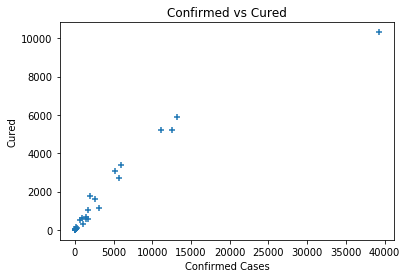

In [197]:
plt.scatter(df1[["Confirmed"]],df1.Cured, marker="+")
plt.xlabel("Confirmed Cases")
plt.ylabel("Cured")
plt.title("Confirmed vs Cured")

In [198]:
# Remove the outliar seen on the top Right corner
#(it seems to be a single observation. So just remove that with a simple method)

In [199]:
df2=df1.iloc[1:,:]
df2.head()

,Cured,Deaths,Confirmed,recovery_rate
State,,,,
Tamil Nadu,5882.0,87.0,13191,45.0
Gujarat,5219.0,749.0,12537,42.0
Delhi,5192.0,176.0,11088,47.0
Rajasthan,3404.0,147.0,6015,57.0
Madhya Pradesh,2733.0,267.0,5735,48.0


In [200]:
from sklearn import linear_model

In [201]:
reg= linear_model.LinearRegression()

In [202]:
reg.fit(df2[["Confirmed"]],df2.Cured)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [217]:
reg.coef_

array([0.45292562])

In [218]:
reg.intercept_

81.49213447839406

# Finally predict number of cured cases for [50000, 100000, 150000, 200000 ]    Confirmed cases

In [214]:
reg.predict([[50000]])

array([22727.77296228])

In [215]:
reg.predict([[100000]])

array([45374.05379008])

In [216]:
reg.predict([[150000]])

array([68020.33461788])

In [213]:
reg.predict([[200000]])

array([90666.61544568])